In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.impute import SimpleImputer

import pickle

In [18]:
url = 'https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv'

pd.read_csv(url).to_csv('../data/raw/diabetes.csv')

In [19]:
df = pd.read_csv('../data/raw/diabetes.csv').drop(['Unnamed: 0'], axis = 1).drop_duplicates().reset_index(drop = True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


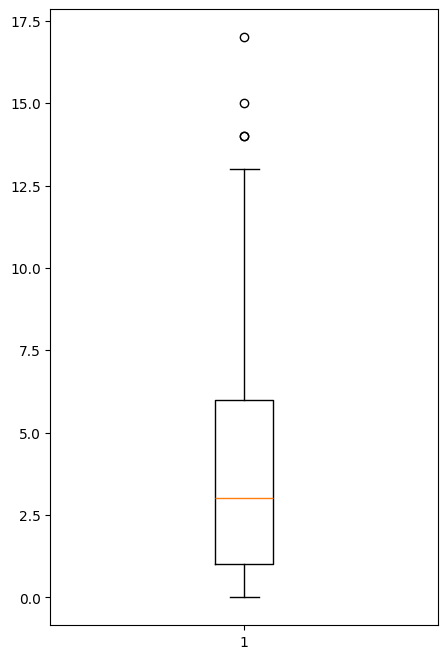

In [21]:

plt.figure(figsize= (5, 8))

plt.boxplot(df['Pregnancies'])

plt.show()

In [22]:
df= df[df['Pregnancies'] < 14]
sorted(df['Pregnancies'].unique())

[np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13)]

In [23]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     373
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [24]:
#Impute colums with 0 value with mean value
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

imputer = SimpleImputer(missing_values=0, strategy='mean')
df[cols_to_fix] = imputer.fit_transform(df[cols_to_fix])

In [25]:
#Train test split
X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
#models to test
models = {'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)}


In [27]:
#loop to test each model at once

results = {}
for name, model in models.items():
    print(f"\nEntrenando modelo: {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print(f'Accurancy: {acc}')
    results[name] = acc


Entrenando modelo: Decision Tree...


              precision    recall  f1-score   support

           0       0.79      0.71      0.75       108
           1       0.44      0.53      0.48        45

    accuracy                           0.66       153
   macro avg       0.61      0.62      0.61       153
weighted avg       0.68      0.66      0.67       153

Accurancy: 0.6601307189542484

Entrenando modelo: Random Forest...
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       108
           1       0.63      0.73      0.68        45

    accuracy                           0.80       153
   macro avg       0.76      0.78      0.77       153
weighted avg       0.81      0.80      0.80       153

Accurancy: 0.7973856209150327

Entrenando modelo: XGBoost...
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       108
           1       0.61      0.69      0.65        45

    accuracy                           0.78       153


/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [28]:
#hiperparams grid

param_grid = {
    'Decision Tree': {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]},

    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]},
        
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3]}}

In [29]:
#loop to test each model with hiperparams
best_models = {}
for model_name, model in models.items():
    print(f"Buscando mejores hiperparámetros para: {model_name}")
    grid = GridSearchCV(model, param_grid[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[model_name] = grid.best_estimator_

Buscando mejores hiperparámetros para: Decision Tree
Buscando mejores hiperparámetros para: Random Forest
Buscando mejores hiperparámetros para: XGBoost


/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/trainin

In [30]:
#let's see both results
print('Results for basic models')
for name, result in results.items():
    print(f'{name} → Accurancy: {result:.4f}')

print(f'\n')
print('Results for models with hyperparams')
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} → Test Accuracy: {acc:.4f}")

Results for basic models
Decision Tree → Accurancy: 0.6601
Random Forest → Accurancy: 0.7974
XGBoost → Accurancy: 0.7778


Results for models with hyperparams
Decision Tree → Test Accuracy: 0.7908
Random Forest → Test Accuracy: 0.7974
XGBoost → Test Accuracy: 0.8105


The XGBOOST with hiperparams has the best accuracy so we save this model

In [31]:
with open('../models/XGBOOST_Params.pkl', 'wb') as archive:
    pickle.dump(best_models['XGBoost'], archive)